**Preprocessing**

In [ ]:
import pandas as pd, numpy as np
from seaborn import heatmap
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.datasets import fetch_openml

titanic = fetch_openml(name="titanic", version=1, parser='auto', as_frame=True)
titanic_df = pd.concat([titanic.data, titanic.target], axis=1)

X = titanic_df[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']]
y = titanic_df['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numeric_features = ['age', 'sibsp', 'parch', 'fare']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorica<l_features = ['pclass', 'sex', 'embarked']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

**KNN**

In [ ]:
knn_clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=10))
])

knn_clf.fit(X_train, y_train)

y_pred = knn_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.76

Confusion Matrix:
[[133  11]
 [ 53  65]]

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.92      0.81       144
           1       0.86      0.55      0.67       118

    accuracy                           0.76       262
   macro avg       0.79      0.74      0.74       262
weighted avg       0.78      0.76      0.74       262



**Métriques**

Accuracy (exactitude)
- proportion d'instances correctement classées par rapport au nombre total d'instances
- VN + VP / (VN + VP + FP + FN)

Precision
- identifier uniquement les exemples positifs corrects parmi toutes les instances identifiées comme positives
- VP/(VP + FP)

Recall
- identifier tous les exemples positifs réels
- VP/(VP + FN)

F1
- moyenne harmonique de recall et precision, combine les deux
- 2 * (precision * recall) / (precision + recall)

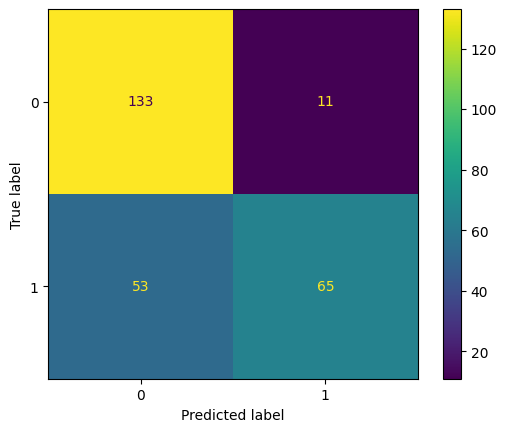

In [ ]:
cmp = ConfusionMatrixDisplay(conf_matrix).plot()

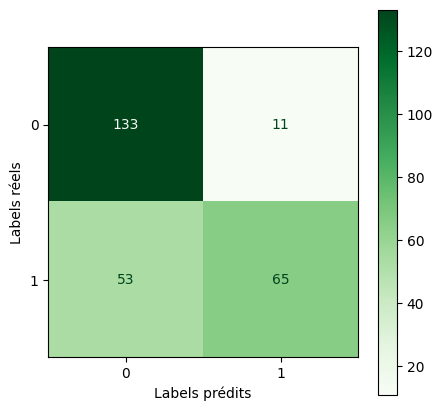

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
cmp = ConfusionMatrixDisplay(conf_matrix)
cmp.plot(cmap = 'Greens', ax = ax)
ax.set_xlabel('Labels prédits')
ax.set_ylabel('Labels réels')
plt.show()

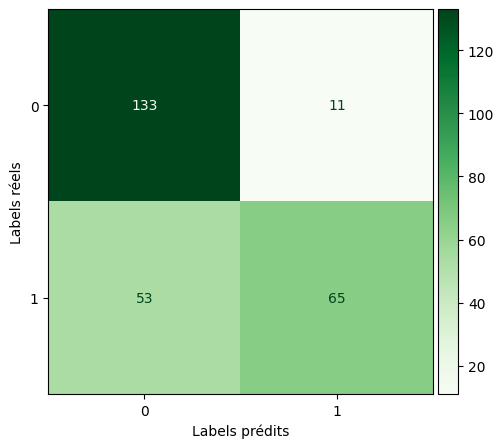

In [ ]:
cmp = ConfusionMatrixDisplay(conf_matrix)

fig, ax = plt.subplots(figsize=(5, 5))
cmp.plot(ax=ax, colorbar=False, cmap = 'Greens')

cax = fig.add_axes([ax.get_position().x1+0.01,ax.get_position().y0, 0.04, ax.get_position().height])
plt.colorbar(cmp.im_, cax=cax)

ax.set_xlabel('Labels prédits')
ax.set_ylabel('Labels réels')
plt.show()

In [ ]:
def plot_confusion_matrix(confusion_mtx, annotation, figsize=(5,5)):
  confusion_mtx = confusion_matrix(y_test, y_pred)
  confusion_mtx = confusion_mtx.astype('float') / confusion_mtx.sum(axis=1)[:, np.newaxis] * 100
  fig, ax = plt.subplots(figsize=figsize)
  ax = heatmap(confusion_mtx, annot = annotation, ax = ax, fmt= '.2f', cmap = 'Greens')
  ax.set_xlabel('Labels prédits')
  ax.set_ylabel('Labels réels')
  plt.show()

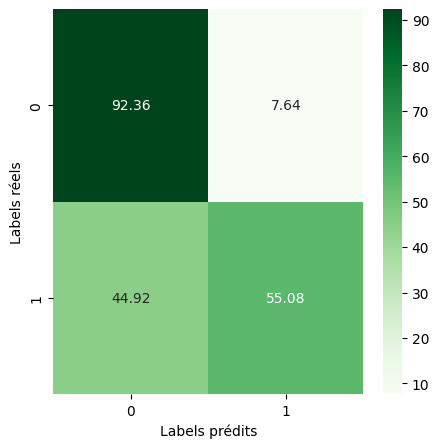

In [ ]:
plot_confusion_matrix(conf_matrix, annotation = True)